In this notebook we try to practice all the classification algorithms that we have learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Let's first load required libraries:


In [ ]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### About dataset


This dataset is about past loans. The **Loan_train.csv** data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
| -------------- | ------------------------------------------------------------------------------------- |
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |


Let's download the dataset


In [ ]:
!wget -O loan_train.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv

"wget" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


### Load Data From CSV File


In [ ]:
import os

In [ ]:
filename = 'loan_train_test.csv'
df = pd.read_csv(filename)

In [ ]:
df.shape

(346, 11)

### Convert to date time object


In [ ]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and pre-processing


Let’s see how many of each class is in our data set


In [ ]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection


Let's plot some columns to underestand data better:


In [ ]:
# notice: installing seaborn might takes a few minutes
#!conda install -c anaconda seaborn -y

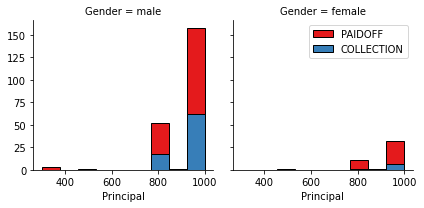

In [ ]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

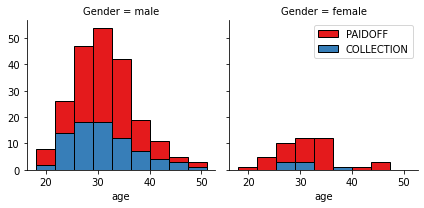

In [ ]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction


### Let's look at the day of the week people get the loan


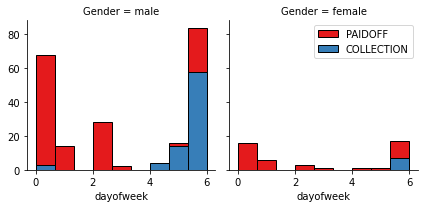

In [ ]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


We see that people who get the loan at the end of the week don't pay it off, so let's use Feature binarization to set a threshold value less than day 4


In [ ]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values


Let's look at gender:


In [ ]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Let's convert male to 0 and female to 1:


In [ ]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding

#### How about education?


In [ ]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Features before One Hot Encoding


In [ ]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame


In [ ]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


### Feature Selection


Let's define feature sets, X:


In [ ]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


What are our lables?


In [ ]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

## Normalize Data


Data Standardization give data zero mean and unit variance (technically should be done after train test split)


In [ ]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

# Classification


Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:

*   K Nearest Neighbor(KNN)
*   Decision Tree
*   Support Vector Machine
*   Logistic Regression

\__ Notice:\__

*   You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
*   You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
*   You should include the code of the algorithm in the following cells.


# K Nearest Neighbor(KNN)

Notice: You should find the best k to build the model with the best accuracy.\
**warning:** You should not use the **loan_test.csv** for finding the best k, however, you can split your train_loan.csv into train and test to find the best **k**.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [ ]:
Xtrain,Xtest, ytrain,ytest = train_test_split(X,y,test_size=0.2,random_state=7)

Minimum error:  0.2714285714285714 at K = 6
Maximun Jaccard Score:  0.5721100164203612 at K = 6


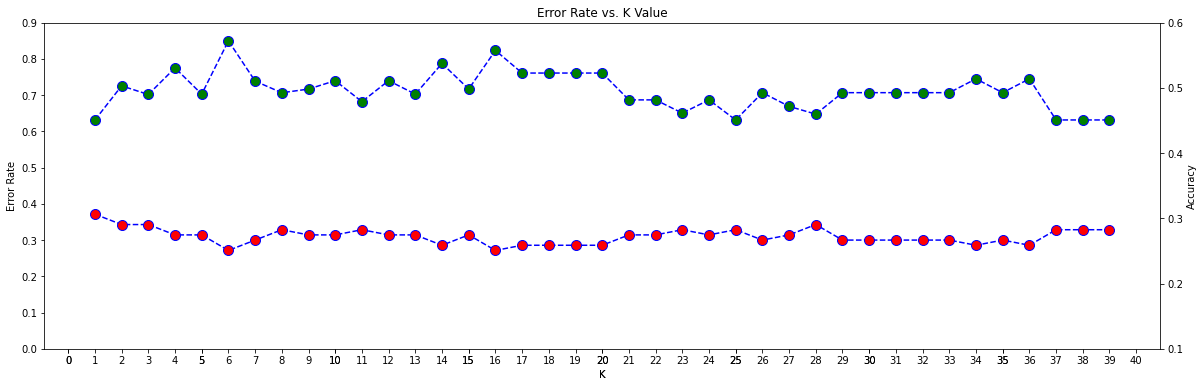

In [ ]:
error_rate = []
for k in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=k)
 knn.fit(Xtrain,ytrain)
 pred_i = knn.predict(Xtest)
 error_rate.append(np.mean(pred_i != ytest))

acc_rate = []
for k in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=k)
 knn.fit(Xtrain,ytrain)
 pred_i = knn.predict(Xtest)
 acc_rate.append(jaccard_score(ytest,pred_i,average='weighted'))

fig = plt.figure(figsize=(20,6))
#plt.figure(figsize=(20,6))
ax = fig.add_subplot(1,1,1,label='1')
ax1 = fig.add_subplot(1,1,1,label='2',frame_on=False)
ax.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
ax.set_title('Error Rate vs. K Value')
ax.set_xticks(np.arange(0,40,1))
ax.set_yticks(np.arange(0,1,0.1))
ax.set_xlabel('K')
ax.set_ylabel('Error Rate')

ax1.plot(range(1,40),acc_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='green', markersize=10)
#ax1.set_title('Accuracy vs. K Value')
ax1.set_yticks(np.arange(0.1,0.7,0.1))
#ax1.set_xticks(np.arange(0,40,1))
ax1.set_xlabel('K')
ax1.set_ylabel('Accuracy')
ax1.yaxis.tick_right()
ax1.yaxis.set_label_position('right')
print("Minimum error: ",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)
print("Maximun Jaccard Score: ",max(acc_rate),"at K =",acc_rate.index(max(acc_rate))+1)

Minimum error:- 0.2714285714285714 at K = 6


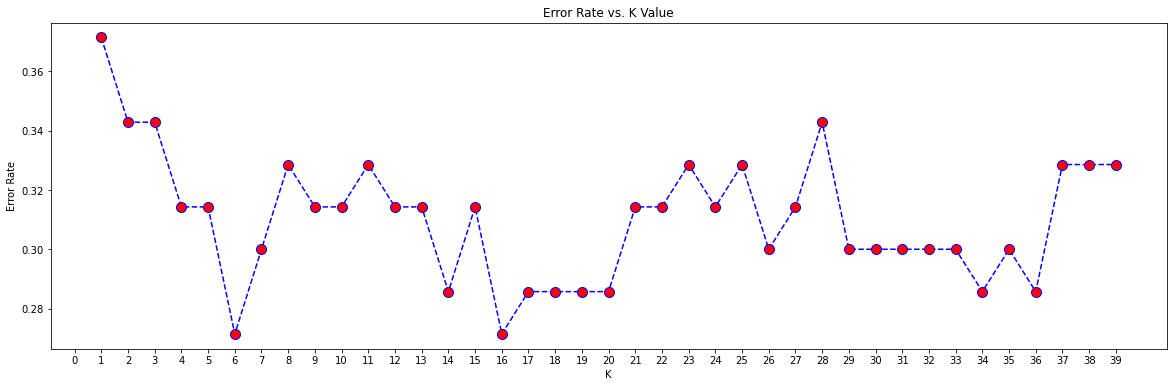

In [ ]:
error_rate = []
for k in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=k)
 knn.fit(Xtrain,ytrain)
 pred_i = knn.predict(Xtest)
 error_rate.append(np.mean(pred_i != ytest))

plt.figure(figsize=(20,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xticks(np.arange(0,40,1))
plt.xlabel('K')
plt.ylabel('Error Rate')

print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)

Maximun Jaccard Score:  0.5721100164203612 at K = 6


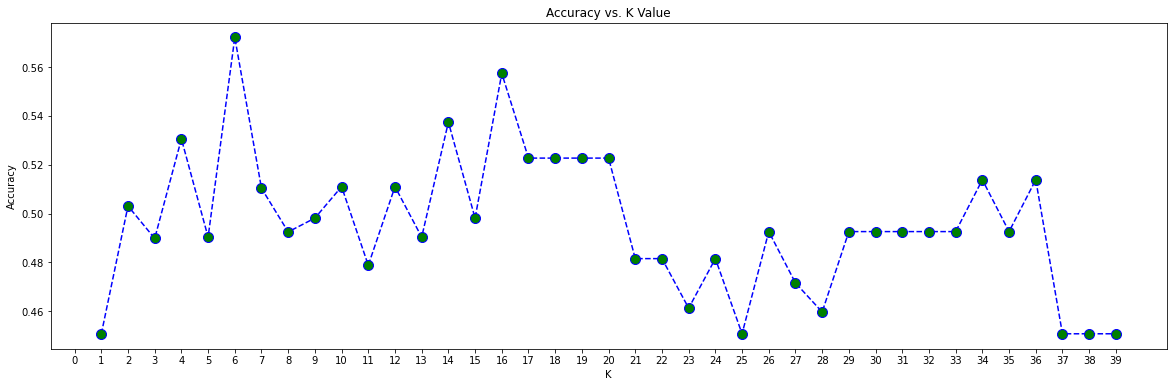

In [ ]:
acc_rate = []
for k in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=k)
 knn.fit(Xtrain,ytrain)
 pred_i = knn.predict(Xtest)
 acc_rate.append(jaccard_score(ytest,pred_i,average='weighted'))

plt.figure(figsize=(20,6))
plt.plot(range(1,40),acc_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='green', markersize=10)
plt.title('Accuracy vs. K Value')
plt.xticks(np.arange(0,40,1))
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximun Jaccard Score: ",max(acc_rate),"at K =",acc_rate.index(max(acc_rate))+1)

Maximun Jaccard Score:  0.7136183948065137 at K = 6


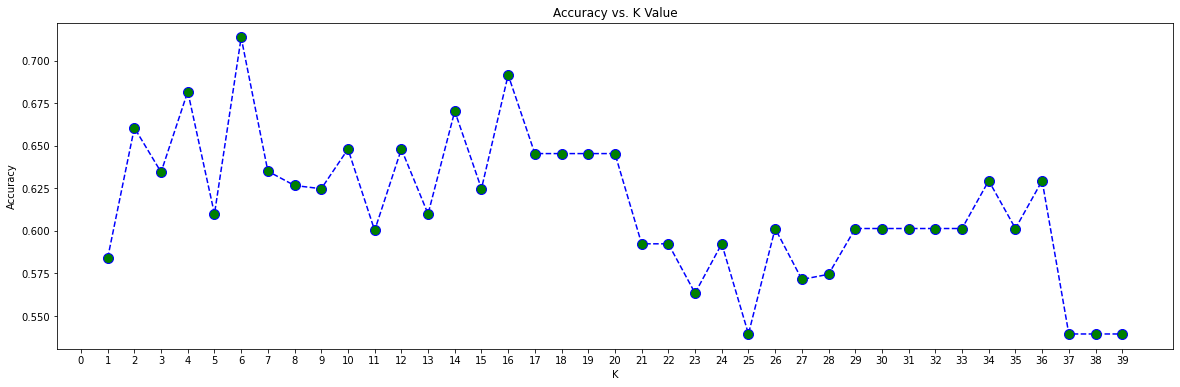

In [ ]:
acc_rate = []
for k in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=k)
 knn.fit(Xtrain,ytrain)
 pred_i = knn.predict(Xtest)
 acc_rate.append(f1_score(ytest,pred_i,average='weighted'))

plt.figure(figsize=(20,6))
plt.plot(range(1,40),acc_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='green', markersize=10)
plt.title('Accuracy vs. K Value')
plt.xticks(np.arange(0,40,1))
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximun Jaccard Score: ",max(acc_rate),"at K =",acc_rate.index(max(acc_rate))+1)

Minimum error:  0.2714285714285714 at K = 6
Maximun Jaccard Score:  0.5721100164203612 at K = 6
Maximun F1 Score:  0.7136183948065137 at K = 6


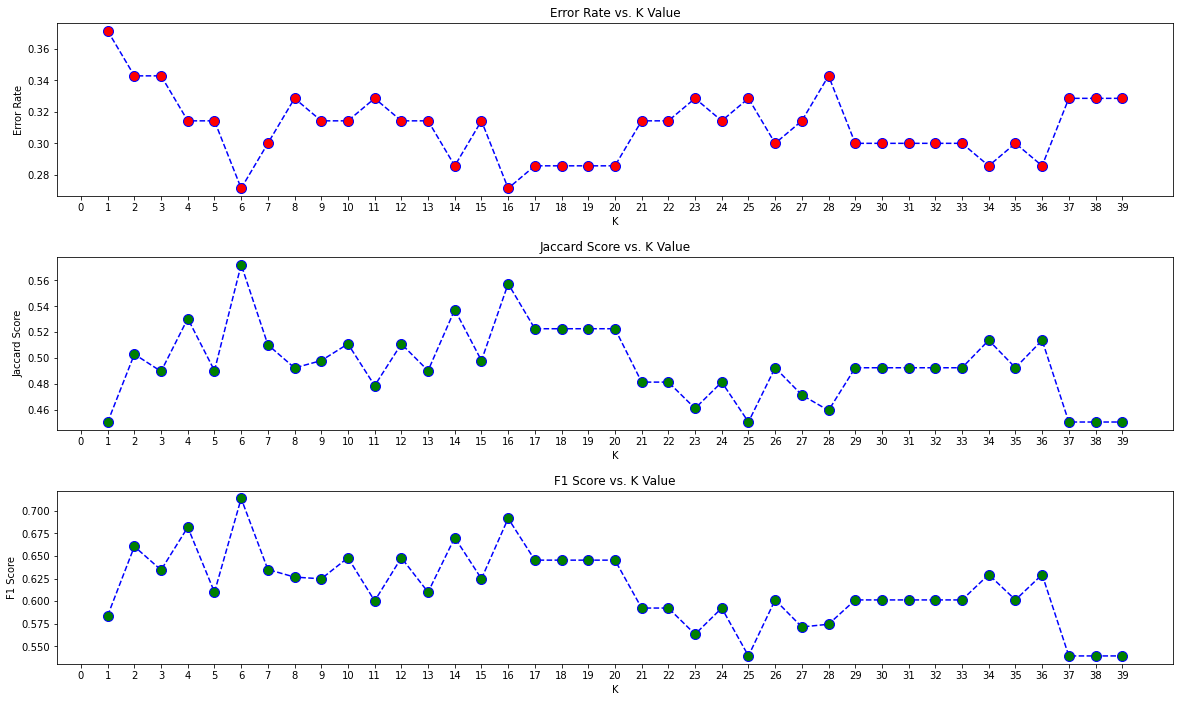

In [ ]:
error_rate = []
for k in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=k)
 knn.fit(Xtrain,ytrain)
 pred_i = knn.predict(Xtest)
 error_rate.append(np.mean(pred_i != ytest))

jacc_acc_rate = []
for k in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=k)
 knn.fit(Xtrain,ytrain)
 pred_i = knn.predict(Xtest)
 jacc_acc_rate.append(jaccard_score(ytest,pred_i,average='weighted'))

f1_acc_rate = []
for k in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=k)
 knn.fit(Xtrain,ytrain)
 pred_i = knn.predict(Xtest)
 f1_acc_rate.append(f1_score(ytest,pred_i,average='weighted'))

# Defino la estructura del grafico
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(3,1,1)
ax1 = fig.add_subplot(3,1,2)
ax2 = fig.add_subplot(3,1,3)

# Defino el primer line plot
ax.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
ax.set_title('Error Rate vs. K Value')
ax.set_xticks(np.arange(0,40,1))
ax.set_xlabel('K')
ax.set_ylabel('Error Rate')

# Defino el segundo line plot
ax1.plot(range(1,40),jacc_acc_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='green', markersize=10)
ax1.set_title('Jaccard Score vs. K Value')
ax1.set_xticks(np.arange(0,40,1))
ax1.set_xlabel('K')
ax1.set_ylabel('Jaccard Score')

# Defino el tercer line plot
#ax2.figure(figsize=(20,6))
ax2.plot(range(1,40),f1_acc_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='green', markersize=10)
ax2.set_title('F1 Score vs. K Value')
ax2.set_xticks(np.arange(0,40,1))
ax2.set_xlabel('K')
ax2.set_ylabel('F1 Score')

# Defino la distribucion para que el grafico no se superponga y sea mas armonico
plt.subplots_adjust(left=0.125,
                    bottom=0.01, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.35)

print("Minimum error: ",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)
print("Maximun Jaccard Score: ",max(jacc_acc_rate),"at K =",jacc_acc_rate.index(max(jacc_acc_rate))+1)
print("Maximun F1 Score: ",max(f1_acc_rate),"at K =",f1_acc_rate.index(max(f1_acc_rate))+1)

In [ ]:
result_matriz = {'Algorithm':['KNN','Decision Tree','SVM','LogisticRegression'],
'Jaccard':[0,0,0,0],'F1 score':[0,0,0,0],'LogLoss':['NA','NA','NA',0],}
result_matriz = pd.DataFrame(result_matriz)
print("Minimum error: ",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)
print("Maximun Jaccard Score: ",max(jacc_acc_rate),"at K =",jacc_acc_rate.index(max(jacc_acc_rate))+1)
print("Maximun F1 Score: ",max(f1_acc_rate),"at K =",f1_acc_rate.index(max(f1_acc_rate))+1)

Minimum error:  0.2714285714285714 at K = 6
Maximun Jaccard Score:  0.5721100164203612 at K = 6
Maximun F1 Score:  0.7136183948065137 at K = 6


## Ambos algoritmos convergen en k=6 con Jaccard Score = 0,57 en test data y F1 Score = 0,71 en test data

In [ ]:
result_matriz.iloc[0,1] = max(jacc_acc_rate)
result_matriz.iloc[0,2] = max(f1_acc_rate)
result_matriz

,Algorithm,Jaccard,F1 score,LogLoss
0,KNN,0.57211,0.713618,NA
1,Decision Tree,0.00000,0.000000,NA
2,SVM,0.00000,0.000000,NA
3,LogisticRegression,0.00000,0.000000,0


# Decision Tree


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from io import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree

In [ ]:
decision_tree = DecisionTreeClassifier(criterion = 'entropy', max_depth=3)
decision_tree.fit(Xtrain,ytrain)
yhat = decision_tree.predict(Xtest)

In [ ]:
jacc_acc_score = []
for i in range(1,10):
    decision_tree = DecisionTreeClassifier(criterion='entropy', max_depth=i)
    decision_tree.fit(Xtrain,ytrain)
    pred_i = decision_tree.predict(Xtest)
    jacc_acc_score.append(jaccard_score(ytest,pred_i,average='weighted'))

f1_acc_score = []
for i in range(1,10):
    decision_tree = DecisionTreeClassifier(criterion='entropy', max_depth=i)
    decision_tree.fit(Xtrain,ytrain)
    pred_i = decision_tree.predict(Xtest)
    f1_acc_score.append(f1_score(ytest,pred_i,average='weighted'))

print('Jaccard score: ',max(jacc_acc_score),
        ' with depth = ',f1_acc_score.index(max(f1_acc_score))+1)
print('F1 score: ',max(f1_acc_score),
        ' with depth = ',jacc_acc_score.index(max(jacc_acc_score))+1)

Jaccard score:  0.48983980689049816  with depth =  7
F1 score:  0.6344980097302078  with depth =  7


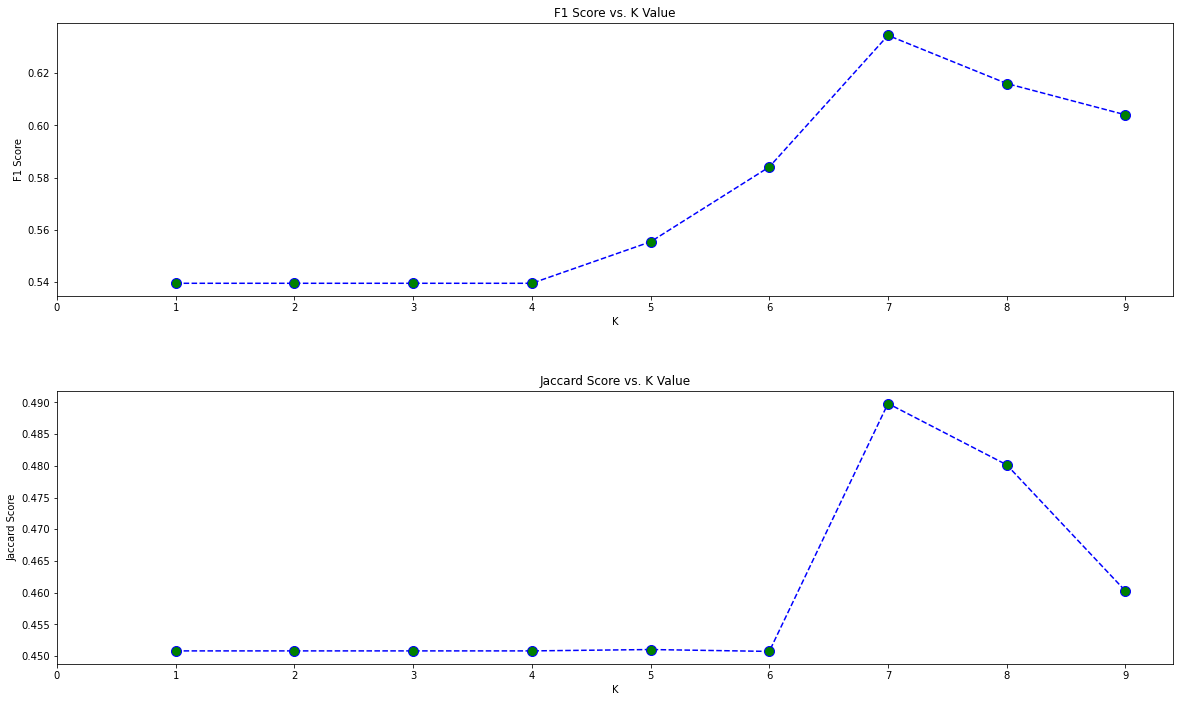

In [ ]:
# Ploteo el grafico para analizar como convergen los algoritmos
# Defino la estructura del grafico
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(2,1,1)
ax1 = fig.add_subplot(2,1,2)

# Defino el primer line plot
ax.plot(range(1,10),f1_acc_score,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='green', markersize=10)
ax.set_title('F1 Score vs. K Value')
ax.set_xticks(np.arange(0,10,1))
ax.set_xlabel('K')
ax.set_ylabel('F1 Score')

# Defino el segundo line plot
ax1.plot(range(1,10),jacc_acc_score,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='green', markersize=10)
ax1.set_title('Jaccard Score vs. K Value')
ax1.set_xticks(np.arange(0,10,1))
ax1.set_xlabel('K')
ax1.set_ylabel('Jaccard Score')

# Defino la distribucion para que el grafico no se superponga y sea mas armonico
plt.subplots_adjust(left=0.125,
                    bottom=0.01, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.35)

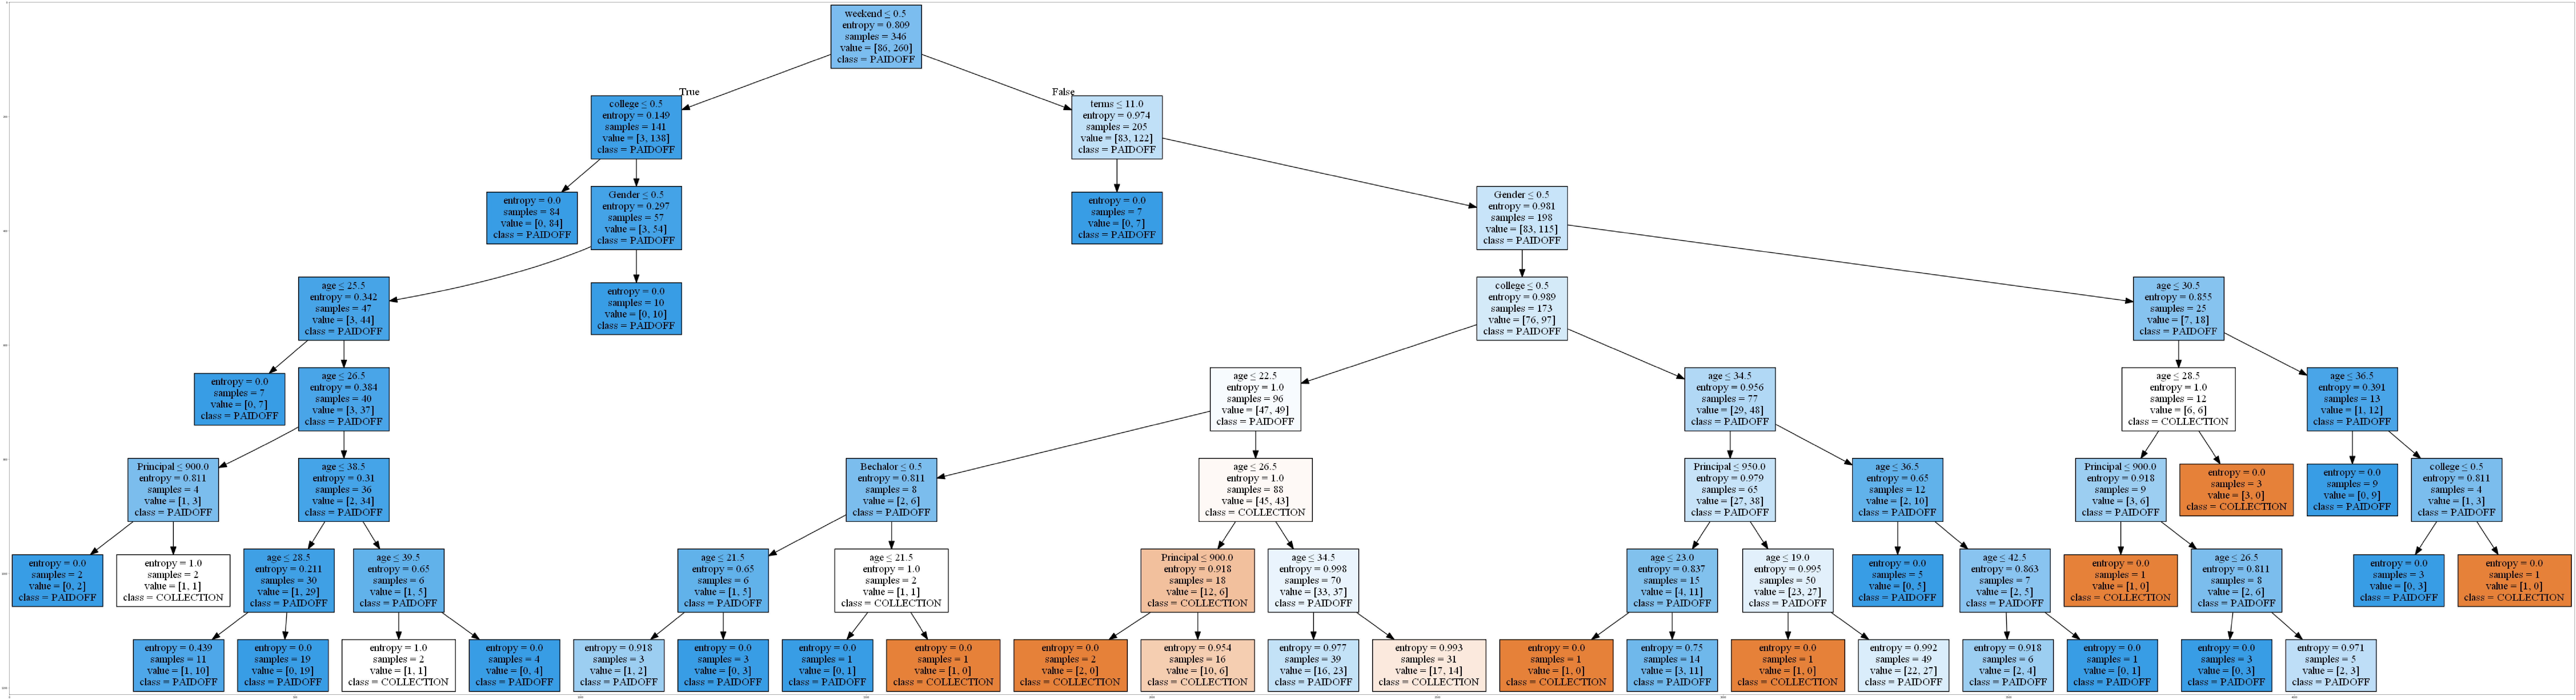

In [ ]:
# Este paso no es necesario, solo lo hago para plotear el arbol
X_tree = Feature.values
y_tree = df['loan_status'].values
decision_tree = DecisionTreeClassifier(criterion='entropy',max_depth=7)
decision_tree.fit(X_tree,y_tree)
dot_data = StringIO()
filename = "Loan_class.png"
featureNames = Feature.columns
out=tree.export_graphviz(decision_tree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(df['loan_status']), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(200, 200))
plt.imshow(img,interpolation='nearest')

In [ ]:
result_matriz.iloc[1,1] = max(jacc_acc_score)
result_matriz.iloc[1,2] = max(f1_acc_score)
result_matriz

,Algorithm,Jaccard,F1 score,LogLoss
0,KNN,0.57211,0.713618,NA
1,Decision Tree,0.48984,0.634498,NA
2,SVM,0.00000,0.000000,NA
3,LogisticRegression,0.00000,0.000000,0


# Support Vector Machine


In [ ]:
import scipy.optimize as opt
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import learning_curve,GridSearchCV
from sklearn.model_selection import LeaveOneOut

## SVM Parameter tunning

In [ ]:
%%capture
# Creo el modelo
SVM_model = SVC()
# Inicializo los parametros para encontrar la mejor combinacion posible
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001], 'kernel':['linear','rbf','poly','sigmoid']}
linear_model = GridSearchCV(SVM_model,param_grid,refit=True,verbose=2)
linear_model.fit(Xtrain,ytrain)

In [ ]:
print(linear_model.best_estimator_)

SVC(C=0.1, gamma=1, kernel='linear')


In [ ]:
c = 0.1
gamma = 1
kernel = 'linear'

SVM_model = SVC(kernel = kernel,C=c , gamma=gamma)
SVM_model.fit(Xtrain,ytrain)
yhat = SVM_model.predict(Xtest)
jacc_acc_score = jaccard_score(ytest,yhat,average='weighted')
f1_acc_score = f1_score(ytest,yhat,average='weighted')

print('Jaccard Score: ',jacc_acc_score)
print('F1 Score: ',f1_acc_score)

Jaccard Score:  0.4508163265306122
F1 Score:  0.5394383394383394


In [ ]:
result_matriz.iloc[2,1] = jacc_acc_score
result_matriz.iloc[2,2] = f1_acc_score
result_matriz

,Algorithm,Jaccard,F1 score,LogLoss
0,KNN,0.572110,0.713618,NA
1,Decision Tree,0.489840,0.634498,NA
2,SVM,0.450816,0.539438,NA
3,LogisticRegression,0.000000,0.000000,0


# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [ ]:
%%capture
LR = LogisticRegression()
param_grid = {'penalty':['l1','l2','elasticnet'],'C':[0.1,1, 10, 100],
            'solver':['newton-cg','lbfgs','liblinear','sag','saga']}
LR = GridSearchCV(LR,param_grid,refit=True,verbose=2)
LR.fit(Xtrain,ytrain)

In [ ]:
print(LR.best_estimator_)

LogisticRegression(C=0.1, penalty='l1', solver='liblinear')


In [ ]:
# Inicializamos los parametros obtenidos en el mejor estimador del modelo
C = 0.1
penalty = 'l1'
solver = 'liblinear'

LR = LogisticRegression(C=C,penalty=penalty,solver=solver)
LR.fit(Xtrain,ytrain)
yhat = LR.predict(Xtest)

# Para el log loss tenemos que calcular las probabilidades de los valores predichos
yhat2 = LR.predict_proba(Xtest)

In [ ]:
# Calculamos las metricas para medir como performa el modelo
jacc_acc_score = jaccard_score(ytest,yhat,average='weighted')
f1_acc_score = f1_score(ytest,yhat,average='weighted')
log_acc_score = log_loss(ytest,yhat2)

print('Jaccard Score: ', jacc_acc_score)
print('F1 Score: ', f1_acc_score)
print('Log Loss: ', log_acc_score)

Jaccard Score:  0.4508163265306122
F1 Score:  0.5394383394383394
Log Loss:  0.5354259410746812


In [ ]:
result_matriz.iloc[3,1] = jacc_acc_score
result_matriz.iloc[3,2] = f1_acc_score
result_matriz.iloc[3,3] = log_acc_score
result_matriz

,Algorithm,Jaccard,F1 score,LogLoss
0,KNN,0.572110,0.713618,NA
1,Decision Tree,0.489840,0.634498,NA
2,SVM,0.450816,0.539438,NA
3,LogisticRegression,0.450816,0.539438,0.535426


# Model Evaluation using Test set


In [ ]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


First, download and load the test set:


In [ ]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

"wget" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


### Load Test set for evaluation


In [ ]:
# Read the dataset
test_df = pd.read_csv('loan_test.csv')

# Transformations
test_df['due_date'] = pd.to_datetime(df['due_date'])
test_df['effective_date'] = pd.to_datetime(df['effective_date'])
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek
test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)

# Select the main features
Feature_test = test_df[['Principal','terms','age','Gender','weekend']]
Feature_test = pd.concat([Feature_test,pd.get_dummies(test_df['education'])], axis=1)
Feature_test.drop(['Master or Above'], axis = 1,inplace=True)
Feature_test.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,50,1,0,1,0,0
1,300,7,35,0,0,0,0,0
2,1000,30,43,1,0,0,1,0
3,1000,30,26,0,1,0,0,1
4,800,15,29,0,1,1,0,0


In [ ]:
Feature.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


In [ ]:
yvalid = test_df['loan_status'].values
# xvalid = Feature_test.values
Xvalid= preprocessing.StandardScaler().fit(Feature_test).transform(Feature_test)

In [ ]:
result_validation = {'Algorithm':['KNN','Decision Tree','SVM','LogisticRegression'],
'Jaccard':[0,0,0,0],'F1 score':[0,0,0,0],'LogLoss':['NA','NA','NA',0],}
result_validation = pd.DataFrame(result_validation)
result_validation

,Algorithm,Jaccard,F1 score,LogLoss
0,KNN,0,0,NA
1,Decision Tree,0,0,NA
2,SVM,0,0,NA
3,LogisticRegression,0,0,0


### KNN model  - Validation

In [ ]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(Xtrain,ytrain)
yresult = knn.predict(Xvalid)
jacc_knn_valid = jaccard_score(yvalid,yresult,average='weighted')
f1_knn_valid = f1_score(yvalid,yresult,average='weighted')
print('Jaccard Score: ',jacc_knn_valid)
print('F1 Score: ',f1_knn_valid)

Jaccard Score:  0.4876543209876543
F1 Score:  0.6296296296296297


### Decision Tree model - Validation

In [ ]:
decision_tree = DecisionTreeClassifier(criterion = 'entropy', max_depth=7)
decision_tree.fit(Xtrain,ytrain)
yresult = decision_tree.predict(Xvalid)
jacc_tree_valid = jaccard_score(yvalid,yresult,average='weighted')
f1_tree_valid = f1_score(yvalid,yresult,average='weighted')
print('Jaccard Score: ',jacc_tree_valid)
print('F1 Score: ',f1_tree_valid)

Jaccard Score:  0.5674786720115119
F1 Score:  0.7097815764482431


### SVM Model - Validation

In [ ]:
yresult = SVM_model.predict(Xvalid)
jacc_svm_valid = jaccard_score(yvalid,yresult,average='weighted')
f1_svm_valid = f1_score(yvalid,yresult,average='weighted')
print('Jaccard Score: ',jacc_svm_valid)
print('F1 Score: ',f1_svm_valid)

Jaccard Score:  0.5486968449931412
F1 Score:  0.6304176516942475


### Logistic Regression Model - Validation

In [ ]:
yresult = LR.predict(Xvalid)
yresult2 = LR.predict_proba(Xvalid)
jacc_LR_valid = jaccard_score(yvalid,yresult,average='weighted')
f1_LR_valid = f1_score(yvalid,yresult,average='weighted')
log_loss_LR_valid = log_loss(yvalid,yresult2)

print('Jaccard Score: ',jacc_LR_valid)
print('F1 Score: ',f1_LR_valid)
print('Log Loss: ',log_loss_LR_valid)

Jaccard Score:  0.5486968449931412
F1 Score:  0.6304176516942475
Log Loss:  0.5554920344372193


In [ ]:
result_validation.iloc[0,1] = jacc_knn_valid
result_validation.iloc[0,2] = f1_knn_valid
result_validation.iloc[1,1] = jacc_tree_valid
result_validation.iloc[1,2] = f1_tree_valid
result_validation.iloc[2,1] = jacc_svm_valid
result_validation.iloc[2,2] = f1_svm_valid
result_validation.iloc[3,1] = jacc_LR_valid
result_validation.iloc[3,2] = f1_LR_valid
result_validation.iloc[3,3] = log_loss_LR_valid
result_validation

,Algorithm,Jaccard,F1 score,LogLoss
0,KNN,0.487654,0.629630,NA
1,Decision Tree,0.567479,0.709782,NA
2,SVM,0.548697,0.630418,NA
3,LogisticRegression,0.548697,0.630418,0.555492


## Conclusions
### The best model for this problem is the decision tree, the best parameters are criterion = 'entropy' and max depth = 7
### Thanks for reading
### Maximiliano Pona - Analytics Consultant
### LinkedIn: https://www.linkedin.com/in/maximilianoezequielpona/

# Report

You should be able to report the accuracy of the built model using different evaluation metrics:


| Algorithm          | Jaccard | F1-score | LogLoss |
| ------------------ | ------- | -------- | ------- |
| KNN                | ?       | ?        | NA      |
| Decision Tree      | ?       | ?        | NA      |
| SVM                | ?       | ?        | NA      |
| LogisticRegression | ?       | ?        | ?       |


<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="http://cocl.us/ML0101EN-SPSSModeler?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2021-01-01">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://cocl.us/ML0101EN_DSX?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2021-01-01">Watson Studio</a>

<h3>Thanks for completing this lesson!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2021-01-01?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2021-01-01">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>

<hr>

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description                                                             |
| ----------------- | ------- | ------------- | ------------------------------------------------------------------------------ |
| 2020-10-27        | 2.1     | Lakshmi Holla | Made changes in import statement due to updates in version of  sklearn library |
| 2020-08-27        | 2.0     | Malika Singla | Added lab to GitLab                                                            |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
